# Comparing Vegas generated without scanning with the KDE prediction in observables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parameters_dict import physics_parameters
from exp_analysis_class import exp_analysis
from plot_utils import *

### Get objects for all 4 cases 

we would like to compare them

notation = my_exp_analysis_{h for heavy, l for light}{d for dirac, m for majora}

In [3]:
hierarchy = 'heavy'
D_or_M = 'dirac'
save_folder = (f'../fig/3_comparison_observables/{hierarchy}_{D_or_M}/')
!mkdir -p $save_folder
my_exp_analysis_hd = exp_analysis(hierarchy, D_or_M)
my_exp_analysis_hd.load_df_base(1000000)


(3686822,)


In [4]:
hierarchy = 'heavy'
D_or_M = 'majorana'
save_folder = (f'../fig/3_comparison_observables/{hierarchy}_{D_or_M}/')
!mkdir -p $save_folder
my_exp_analysis_hm = exp_analysis(hierarchy, D_or_M)
my_exp_analysis_hm.load_df_base(1000000)

(3673807,)


In [9]:
hierarchy = 'light'
D_or_M = 'dirac'
save_folder = (f'../fig/3_comparison_observables/{hierarchy}_{D_or_M}/')
!mkdir -p $save_folder
my_exp_analysis_ld = exp_analysis(hierarchy, D_or_M)
my_exp_analysis_ld.load_df_base(1000000)

1.6000000000000004e-19


In [10]:
hierarchy = 'light'
D_or_M = 'majorana'
save_folder = (f'../fig/3_comparison_observables/{hierarchy}_{D_or_M}/')
!mkdir -p $save_folder
my_exp_analysis_lm = exp_analysis(hierarchy, D_or_M)
my_exp_analysis_lm.load_df_base(1000000)

In [11]:
# load all dfs
my_exp_analysis_hd.load_grid_dfs()
my_exp_analysis_hm.load_grid_dfs()
my_exp_analysis_ld.load_grid_dfs()
my_exp_analysis_lm.load_grid_dfs()

## Energy observables

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


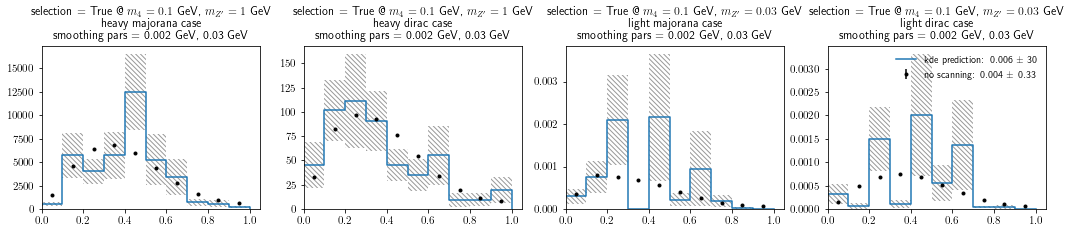

In [45]:
EMIN=0; EMAX= 1.0
bins = 10
var1='ee_energy'
var2=''
# Heavy
m4mz = (0.1, 1)
fig,  axes = plt.subplots(nrows=1, ncols=4,figsize = (18,3))

kde_to_noscan_comparison(var1=var1, var2=var2, 
                         range=(EMIN, EMAX), bins=10, 
                         m4mz=m4mz, 
                         exp_analysis_obj=my_exp_analysis_hm,
                         smoothing_pars=[0.002, 0.03], figure=(fig,axes[0]))

kde_to_noscan_comparison(var1=var1, var2=var2, 
                         range=(EMIN, EMAX), bins=10, 
                         m4mz=m4mz, 
                         exp_analysis_obj=my_exp_analysis_hd,
                         smoothing_pars=[0.002, 0.03], figure=(fig,axes[1]))

# Heavy
m4mz = (0.1, 0.03)
kde_to_noscan_comparison(var1=var1, var2=var2, 
                         range=(EMIN, EMAX), bins=10, 
                         m4mz=m4mz, 
                         exp_analysis_obj=my_exp_analysis_lm,
                         smoothing_pars=[0.002, 0.03], figure=(fig,axes[2]))

kde_to_noscan_comparison(var1=var1, var2=var2, 
                         range=(EMIN, EMAX), bins=10, 
                         m4mz=m4mz, 
                         exp_analysis_obj=my_exp_analysis_ld,
                         smoothing_pars=[0.002, 0.03], figure=(fig,axes[3]))


In [ ]:
kde_to_noscan_comparison(var1='ee_mass', 
                         var2='', 
                         range=(0, 0.1), 
                         bins=10, 
                         m4mz=(0.1, 1), 
                         exp_analysis_obj=my_exp_analysis,
                         smoothing_pars=[0.002, 0.03])

## Angular observables

## Invariant masses

## Lifetimes

# This is all pretty old stuff

## Test comparison between KDE and truth

In [5]:
case = 'light'
pars = {}
pars['heavy'] = {
    'm4' : [0.1, 0.2, 0.3, 0.4],
    'mz_prime': [1.25],
}
pars['light'] = {
    'm4' : [0.2, 0.3, 0.4], 
    'mz_prime': [0.03, 0.045, 0.06],
}

ctaus = [1, 5, 10, 20, 50, 100, 200]
!mkdir -p ../../fig/kde_test_2d/comparison_kde_truth/
save_folder = "../../fig/kde_test_2d/comparison_kde_truth/"
produce_samples = False

#generation part
if produce_samples:
    for m4, mz_prime in itertools.product(pars[case]['m4'], pars[case]['mz_prime']):
        print(m4, mz_prime)
        if case == 'light':
            dark_gen_run = f'cd ..; ./dark_gen.py --M4 {m4} --mzprime {mz_prime} --UMU4 8e-9 --alpha_dark 0.25 --alpha_epsilon2 2e-10 --hierarchy light_mediator --neval 100000 --noplot'
        elif case == 'heavy':
            dark_gen_run = f'cd ..; ./dark_gen.py --M4 {m4} --mzprime {mz_prime} --UMU4 2.2e-7 --alpha_dark 0.4 --epsilon2 4.6e-4 --neval 100000 --noplot --hierarchy heavy_mediator'
        else:
            print('No good case selected')
        stream = os.popen(dark_gen_run)
        print(stream.read())

In [19]:
# 1d histograms with one specific variable
var_1 = 'ee_energy'
var_2 = ''
hist_range = [0, 5]
bins = 20
ctau = 1
smooth_m4 = 0.03
smooth_mz = 0.005

kde_total = dict(zip(['no_selection', 'cut_based'], [[], []]))
truth_total = dict(zip(['no_selection', 'cut_based'], [[], []]))

for m4, mz in itertools.product(pars[case]['m4'], pars[case]['mz_prime']):
    df = pd.read_pickle(f'../data/nd280_nu/3plus1/m4_{m4}_mzprime_{mz}/MC_m4_{m4}_mzprime_{mz}.pckl')
    initialise_df(df)
    for selection_step in ['no_selection', 'cut_based']:

        aux_out = output_distrib(df_base, var_1, var_2, bins, hist_range, m4, mz, ctau, smooth_m4, smooth_mz, selection_step)
        kde_total[selection_step].append(aux_out)

        truth_weights = df['actual_weight', '']*df[selection_step, '']
        plt.hist(df[var_1, var_2],
             range=hist_range,
             bins=bins,
             weights=truth_weights,
             histtype='step',
             label=f'truth with $m_4$ = {m4:.2g} GeV, $m_Z$ = {mz:.2g} GeV\nexpected events = {truth_weights.sum():.1f}')
        truth_total[selection_step].append(truth_weights.sum())
        plt.autoscale()
        plt.legend(frameon=False)
        plt.savefig(save_folder+f"case_{case}_m4_{m4}_mz_{mz}_N_{n_evt}_{selection_step}.png", bbox_inches='tight', dpi=250)
        plt.close()

no_selection
m4 = 0.2, mz = 0.03, kde = 1.9e+03, truth = 1.9e+03, ratio = 1
cut_based
m4 = 0.2, mz = 0.03, kde = 7.3e+02, truth = 6.8e+02, ratio = 1.1
no_selection
m4 = 0.2, mz = 0.045, kde = 7.1e+02, truth = 1.2e+03, ratio = 0.58
cut_based
m4 = 0.2, mz = 0.045, kde = 2.5e+02, truth = 4.2e+02, ratio = 0.59
no_selection
m4 = 0.2, mz = 0.06, kde = 4.1e+02, truth = 6.6e+02, ratio = 0.63
cut_based
m4 = 0.2, mz = 0.06, kde = 1.5e+02, truth = 2.2e+02, ratio = 0.66
no_selection
m4 = 0.3, mz = 0.03, kde = 6e+02, truth = 6.8e+02, ratio = 0.87
cut_based
m4 = 0.3, mz = 0.03, kde = 2.8e+02, truth = 3.2e+02, ratio = 0.87
no_selection
m4 = 0.3, mz = 0.045, kde = 3e+02, truth = 3.7e+02, ratio = 0.79
cut_based
m4 = 0.3, mz = 0.045, kde = 1.2e+02, truth = 1.5e+02, ratio = 0.78
no_selection
m4 = 0.3, mz = 0.06, kde = 1.9e+02, truth = 2e+02, ratio = 0.98
cut_based
m4 = 0.3, mz = 0.06, kde = 72, truth = 75, ratio = 0.97
no_selection
m4 = 0.4, mz = 0.03, kde = 2.5e+02, truth = 2.5e+02, ratio = 0.98
cut_bas

In [12]:
# 2d ratio of kde and truth
smooth_m4 = 0.03
smooth_mz = 0.005
ctau = 10

kde_total = dict(zip(['no_selection', 'cut_based'], [[], []]))
truth_total = dict(zip(['no_selection', 'cut_based'], [[], []]))
likes_kde = dict(zip(['no_selection', 'cut_based'], [[], []]))
likes_truth = dict(zip(['no_selection', 'cut_based'], [[], []]))
ratios = dict(zip(['no_selection', 'cut_based'], [[], []]))
sigma_ratios = dict(zip(['no_selection', 'cut_based'], [[], []]))

for m4, mz in itertools.product(pars[case]['m4'], pars[case]['mz_prime']):
    df = pd.read_pickle(f'../data/nd280_nu/3plus1/m4_{m4}_mzprime_{mz}/MC_m4_{m4}_mzprime_{mz}.pckl')
    initialise_df(df)
    for selection_step in ['no_selection', 'cut_based']:
        mu_kde, sigma2_kde = mu_sigma2_of_theta(df_base, m4, mz, ctau, smooth_m4, smooth_mz, selection_step)
        kde_total[selection_step].append(mu_kde)
        likes_kde[selection_step].append(LEff(0, mu_kde, sigma2_kde))

        mu_truth = (df['actual_weight', '']*df[selection_step, '']).sum()
        sigma2_truth = ((df['actual_weight', '']*df[selection_step, ''])**2).sum()
        truth_total[selection_step].append(mu_truth)
        likes_truth[selection_step].append(LEff(0, mu_truth, sigma2_truth))

        ratio = mu_kde/mu_truth
        ratios[selection_step].append(ratio)
        
        sigma_ratio = ratio*np.sqrt(sigma2_kde/(mu_kde**2) + sigma2_truth/(mu_truth**2))
        sigma_ratios[selection_step].append(sigma_ratio)
        print(selection_step)
        print(f"m4 = {m4}, mz = {mz}, kde = {mu_kde:.2g}, truth = {mu_truth:.2g}, ratio = {ratio:.2g} +/- {sigma_ratio:.2g}")
        print(f"relative sigma_kde = {np.sqrt(sigma2_kde)/mu_kde:.2g}, sigma_truth = {np.sqrt(sigma2_truth)/mu_truth:.2g}")

no_selection
m4 = 0.2, mz = 0.03, kde = 1.9e+03, truth = 1.9e+03, ratio = 1 +/- 0.0055
relative sigma_kde = 0.0049, sigma_truth = 0.0026
cut_based
m4 = 0.2, mz = 0.03, kde = 7.3e+02, truth = 6.8e+02, ratio = 1.1 +/- 0.0088
relative sigma_kde = 0.0071, sigma_truth = 0.0042
no_selection
m4 = 0.2, mz = 0.045, kde = 7.1e+02, truth = 1.2e+03, ratio = 0.58 +/- 0.0055
relative sigma_kde = 0.009, sigma_truth = 0.0033
cut_based
m4 = 0.2, mz = 0.045, kde = 2.5e+02, truth = 4.2e+02, ratio = 0.59 +/- 0.0085
relative sigma_kde = 0.013, sigma_truth = 0.0054
no_selection
m4 = 0.2, mz = 0.06, kde = 4.1e+02, truth = 6.6e+02, ratio = 0.63 +/- 0.011
relative sigma_kde = 0.017, sigma_truth = 0.0031
cut_based
m4 = 0.2, mz = 0.06, kde = 1.5e+02, truth = 2.2e+02, ratio = 0.66 +/- 0.017
relative sigma_kde = 0.025, sigma_truth = 0.0052
no_selection
m4 = 0.3, mz = 0.03, kde = 6e+02, truth = 6.8e+02, ratio = 0.87 +/- 0.0049
relative sigma_kde = 0.0046, sigma_truth = 0.0032
cut_based
m4 = 0.3, mz = 0.03, kde = 2.

In [14]:
def create_bin_edges_from_array(ar):
    ar_min = 2* ar[0] - ar[1]
    ar_max = 2* ar[-1] - ar[-2]
    new_ar = np.array([ar_min] + list(ar) + [ar_max])
    return np.array((new_ar[1:] + new_ar[:-1])/2)

In [41]:
m4_centres = np.array(pars[case]['m4'])
mz_centres = np.array(pars[case]['mz_prime'])
m4_edges = create_bin_edges_from_array(m4_centres)
mz_edges = create_bin_edges_from_array(mz_centres)

ratio_total = {}
for sel in kde_total.keys():
    this_ratio = np.array(ratios[sel]).reshape(len(pars[case]['m4']), len(pars[case]['mz_prime']))
    this_sigma_ratio = np.array(sigma_ratios[sel]).reshape(len(pars[case]['m4']), len(pars[case]['mz_prime']))
    plt.pcolormesh(m4_edges, mz_edges, this_ratio.T)
    for i in range(len(m4_centres)):
        for j in range(len(mz_centres)):
            text = plt.text(pars[case]['m4'][j], pars[case]['mz_prime'][i], f"{this_ratio[j, i]:.3g} $\pm$ {this_sigma_ratio[j, i]:.1g}",
                            ha="center", va="center", color="k")
    plt.colorbar()
    plt.xlabel(r'$m_4$ [GeV]')
    plt.ylabel(r'$m_Z$ [GeV]')
    plt.title(f'KDE estimate/truth ratio at {sel}')
    plt.savefig(save_folder+f"kde_truth_ratio_2d_summary_case_{case}_N_{n_evt}_{sel}.png", bbox_inches='tight', dpi=250)
    plt.close()

In [28]:
m4_centres = np.array(pars[case]['m4'])
mz_centres = np.array(pars[case]['mz_prime'])
m4_edges = create_bin_edges_from_array(m4_centres)
mz_edges = create_bin_edges_from_array(mz_centres)

likes = dict(zip(['kde', 'truth'], [likes_kde, likes_truth]))
for sel in kde_total.keys():
    for mode in ['kde', 'truth']:
        this_like = -1*np.array(likes[mode][sel]).reshape(len(pars[case]['m4']), len(pars[case]['mz_prime']))
        this_like -= this_like.min()
        plt.pcolormesh(m4_edges, mz_edges, this_like.T)
        for i in range(len(m4_centres)):
            for j in range(len(mz_centres)):
                text = plt.text(pars[case]['m4'][j], pars[case]['mz_prime'][i], f"{this_like[j, i]:.3g}",
                                ha="center", va="center", color="k")
        plt.colorbar()
        plt.xlabel(r'$m_4$ [GeV]')
        plt.ylabel(r'$m_Z$ [GeV]')
        plt.title(f'Effective likelihood of seeing 0 events\nestimated with {mode} at {sel}')
        plt.savefig(save_folder+f"likelihood_profile_{mode}_case_{case}_N_{n_evt}_{sel}.png", bbox_inches='tight', dpi=250)
        plt.close()